In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt 
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df = pd.read_csv('Dataset/loan.csv', index_col=0)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.iloc[:3,:20]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN


In [8]:
df.iloc[:3,21:41]

,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00
1,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46
2,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00


In [11]:
df.iloc[:3,42:62]

,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m
0,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df.iloc[:3,63:]

,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Data Exploration

In [3]:
print('total row: ',df.shape[0])
print('total column: ',df.shape[1])

total row:  466285
total column:  74


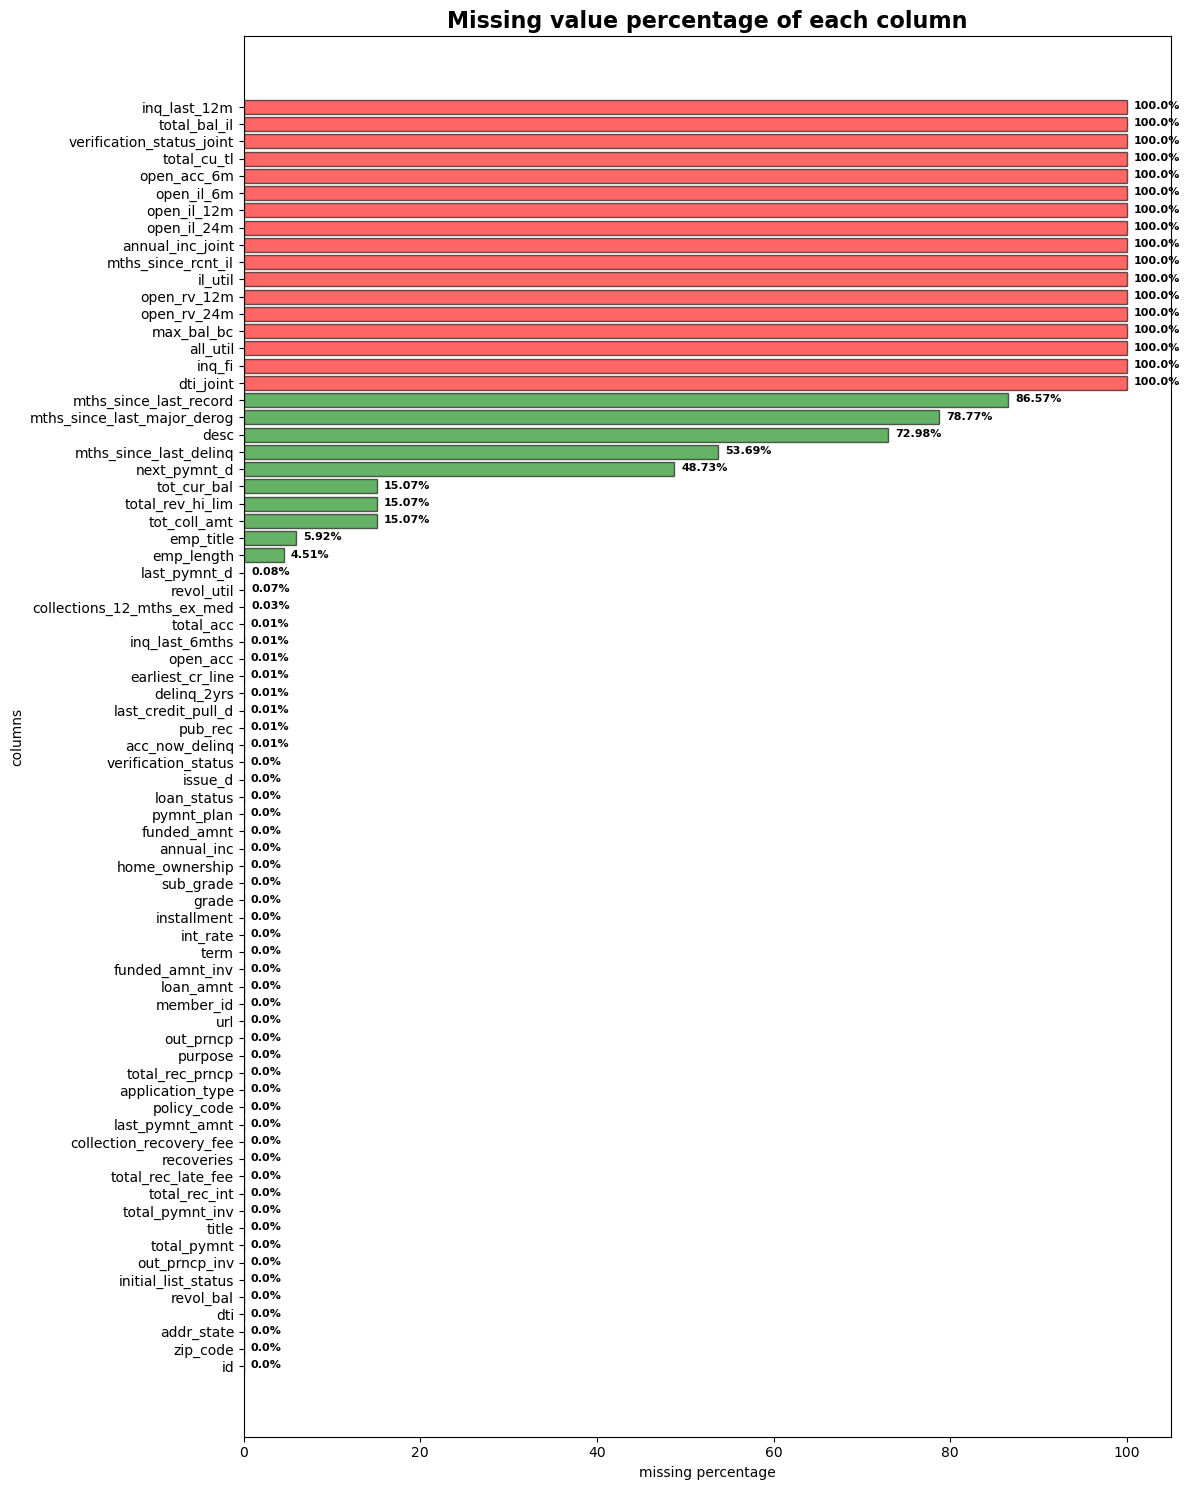

In [4]:
#### Check Null Values
missing = df.isnull().sum()*100 / len(df)
percentage_missing = pd.DataFrame({'columns':missing.index,
                                   'missing_percentage':missing.values})
percentage_missing['missing_percentage'] = percentage_missing['missing_percentage'].round(2)
percentage_missing = percentage_missing.sort_values('missing_percentage')
percentage_missing = percentage_missing.reset_index()
percentage_missing = percentage_missing.drop('index', axis=1)

colors = ['red' if x > 90 else 'green' for x in percentage_missing['missing_percentage']]

plt.figure(figsize=(12, 15))
bars = plt.barh(percentage_missing['columns'], percentage_missing['missing_percentage'],color =colors, edgecolor='black', alpha=0.6)
for p in bars:
    plt.text(p.get_width()+0.8, p.get_y()+p.get_height()/3, str(round(p.get_width(),2))+'%', fontsize=8, fontweight='bold')
    
plt.title('Missing value percentage of each column', fontsize=16, fontweight='bold')
plt.ylabel('columns')
plt.xlabel('missing percentage')
plt.tight_layout()
plt.show()

#### Insight
1. Terdapat 17 column yang memiliki presentase null values sebesar 100 %. Kolom ini akan di hapus otomatis
2. months since last record & months since last derog akan dihapus

### Data cleaning pt.1

In [5]:
percentage_missing_100 = percentage_missing[percentage_missing['missing_percentage'] == 100]
percentage_missing_100 = percentage_missing_100['columns'].values
percentage_missing_100

array(['dti_joint', 'inq_fi', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'mths_since_rcnt_il', 'annual_inc_joint',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'total_cu_tl', 'verification_status_joint', 'total_bal_il',
       'inq_last_12m'], dtype=object)

In [6]:
df.drop(['dti_joint', 'inq_fi', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'mths_since_rcnt_il', 'annual_inc_joint',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'total_cu_tl', 'verification_status_joint', 'total_bal_il',
       'inq_last_12m', 'mths_since_last_record', 'mths_since_last_major_derog',
        'recoveries'], axis=1, inplace=True)

In [7]:
df.shape

(466285, 54)

In [47]:
for cols in df.columns:
    print('------Unique Values Of {} Columns-------'.format(cols))
    print('{} has a {} unique values and data type {}'.format(cols, df[cols].nunique(), df[cols].dtypes))
    print('{} unique are {}'.format(cols, df[cols].unique()))
    print(' ')

------Unique Values Of id Columns-------
id has a 466285 unique values and data type int64
id unique are [1077501 1077430 1077175 ... 9584776 9604874 9199665]
 
------Unique Values Of member_id Columns-------
member_id has a 466285 unique values and data type int64
member_id unique are [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
 
------Unique Values Of loan_amnt Columns-------
loan_amnt has a 1352 unique values and data type int64
loan_amnt unique are [ 5000  2500  2400 ... 33675 27775 33175]
 
------Unique Values Of funded_amnt Columns-------
funded_amnt has a 1354 unique values and data type int64
funded_amnt unique are [ 5000  2500  2400 ... 27775 33175 31725]
 
------Unique Values Of funded_amnt_inv Columns-------
funded_amnt_inv has a 9854 unique values and data type float64
funded_amnt_inv unique are [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
 
------Unique Values Of term Columns-------
term has a 2 unique values and data type object
term unique are [' 36 mo

In [ ]:
bingung
- > dti - >rasio pembayaran hutang bulanan terhadap income
- earliest_cr_line  - > 
- issue_d - > bulan didanai pinjaman
- delinq_2yrs - > jumlah delinq dalam 2 tahun terakhir
- open_acc - > jumlah jenis kredit yang dapat dimanfaatkan oleh debitur
- pub_rec - > jumlah catatan hitam yang dimiliki debitur
- revol_bal - > jumlah hutang yang berputar yang belum lunas
- revol_util - > rasio saldo kredit dengan credit line
- total_acc  - > jumblah brp x credit yang dipinjam dalam file credit
- out_prncp - > sisa pinjaman yang harus dibayar dari total pinjaman (tanpa denda dan bunga)
- total_pymnt - > jumlah pembayaran yang telah diterima hingga saat ini untuk total jumlah dana yang telah didanai.
- total_pymnt_inv - >jumlah dana yang telah diterima oleh investor melalui bank
- total_rec_prncp - > total pinjaman pokok yang telah diterima oleh bank
- total_rec_int - > total bunga yang diterima 
- total_rec_late_fee - > biaya keterlambatan yan diterima
- collection_recovery_fee - > biaya yang dibebankan kepada debitur akibat akun telah charge-off. biaya yang dibebankan oleh debitur akan dberikan kepada divisi collection
- last_pymnt_d -> jumlah terakhir kali melakukan pembayaran dibulan tertentu
- next_pymnt_d - > tanggal pembayaran selanjutnya
- collections_12_mths_ex_med - > berapa kali debitur memiliki catatan koleksi selama periode 12 bulan
- acc_now_delinq - > total debitur delinq saat ini 
- tot_coll_amt - > total biaya collection yang sudah dibayar
- tot_cur_bal - > total hutang saat ini
- total_rev_hi_lim - > total credit line saat ini 

In [ ]:
#### Insight
1. Pada kolom ***'Term'*** akan diubah dari tipe data object ke tipe data int
2. Kolom 'Issue_d'akan diubah dari tipe data object ke tipe datetime
3. Kolom loan_status
- > ['Fully Paid', 'current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid'] menjadi 0
- > ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'] menjadi 1
4. loan amount dan funded amount memiliki nilai sama
5. emp_length dibuat rentang 
6. funded_amnt_inv dihapus
7. last_credit_pull_d akan dihapus

#### Statistical Descriptive

##### Numerik

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,13079729.91,10893711.62,54734.00,3639987.00,10107897.00,20731209.00,38098114.00
member_id,466285.0,14597660.62,11682367.44,70473.00,4379705.00,11941075.00,23001541.00,40860827.00
loan_amnt,466285.0,14317.28,8286.51,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt,466285.0,14291.80,8274.37,500.00,8000.00,12000.00,20000.00,35000.00
funded_amnt_inv,466285.0,14222.33,8297.64,0.00,8000.00,12000.00,19950.00,35000.00
int_rate,466285.0,13.83,4.36,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.06,243.49,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.38,54963.57,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.22,7.85,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.28,0.80,0.00,0.00,0.00,0.00,29.00


kolom collections_12_mths_ex_med, recoveries, collection_recovery_fee, tot_coll_amt, delinq_2yrs & inq_last_6mths memiliki Q1 - Q3 bernilai 0 yang mengakibatkan model menjadi bias

##### Categoric

In [13]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


### Data Distribution

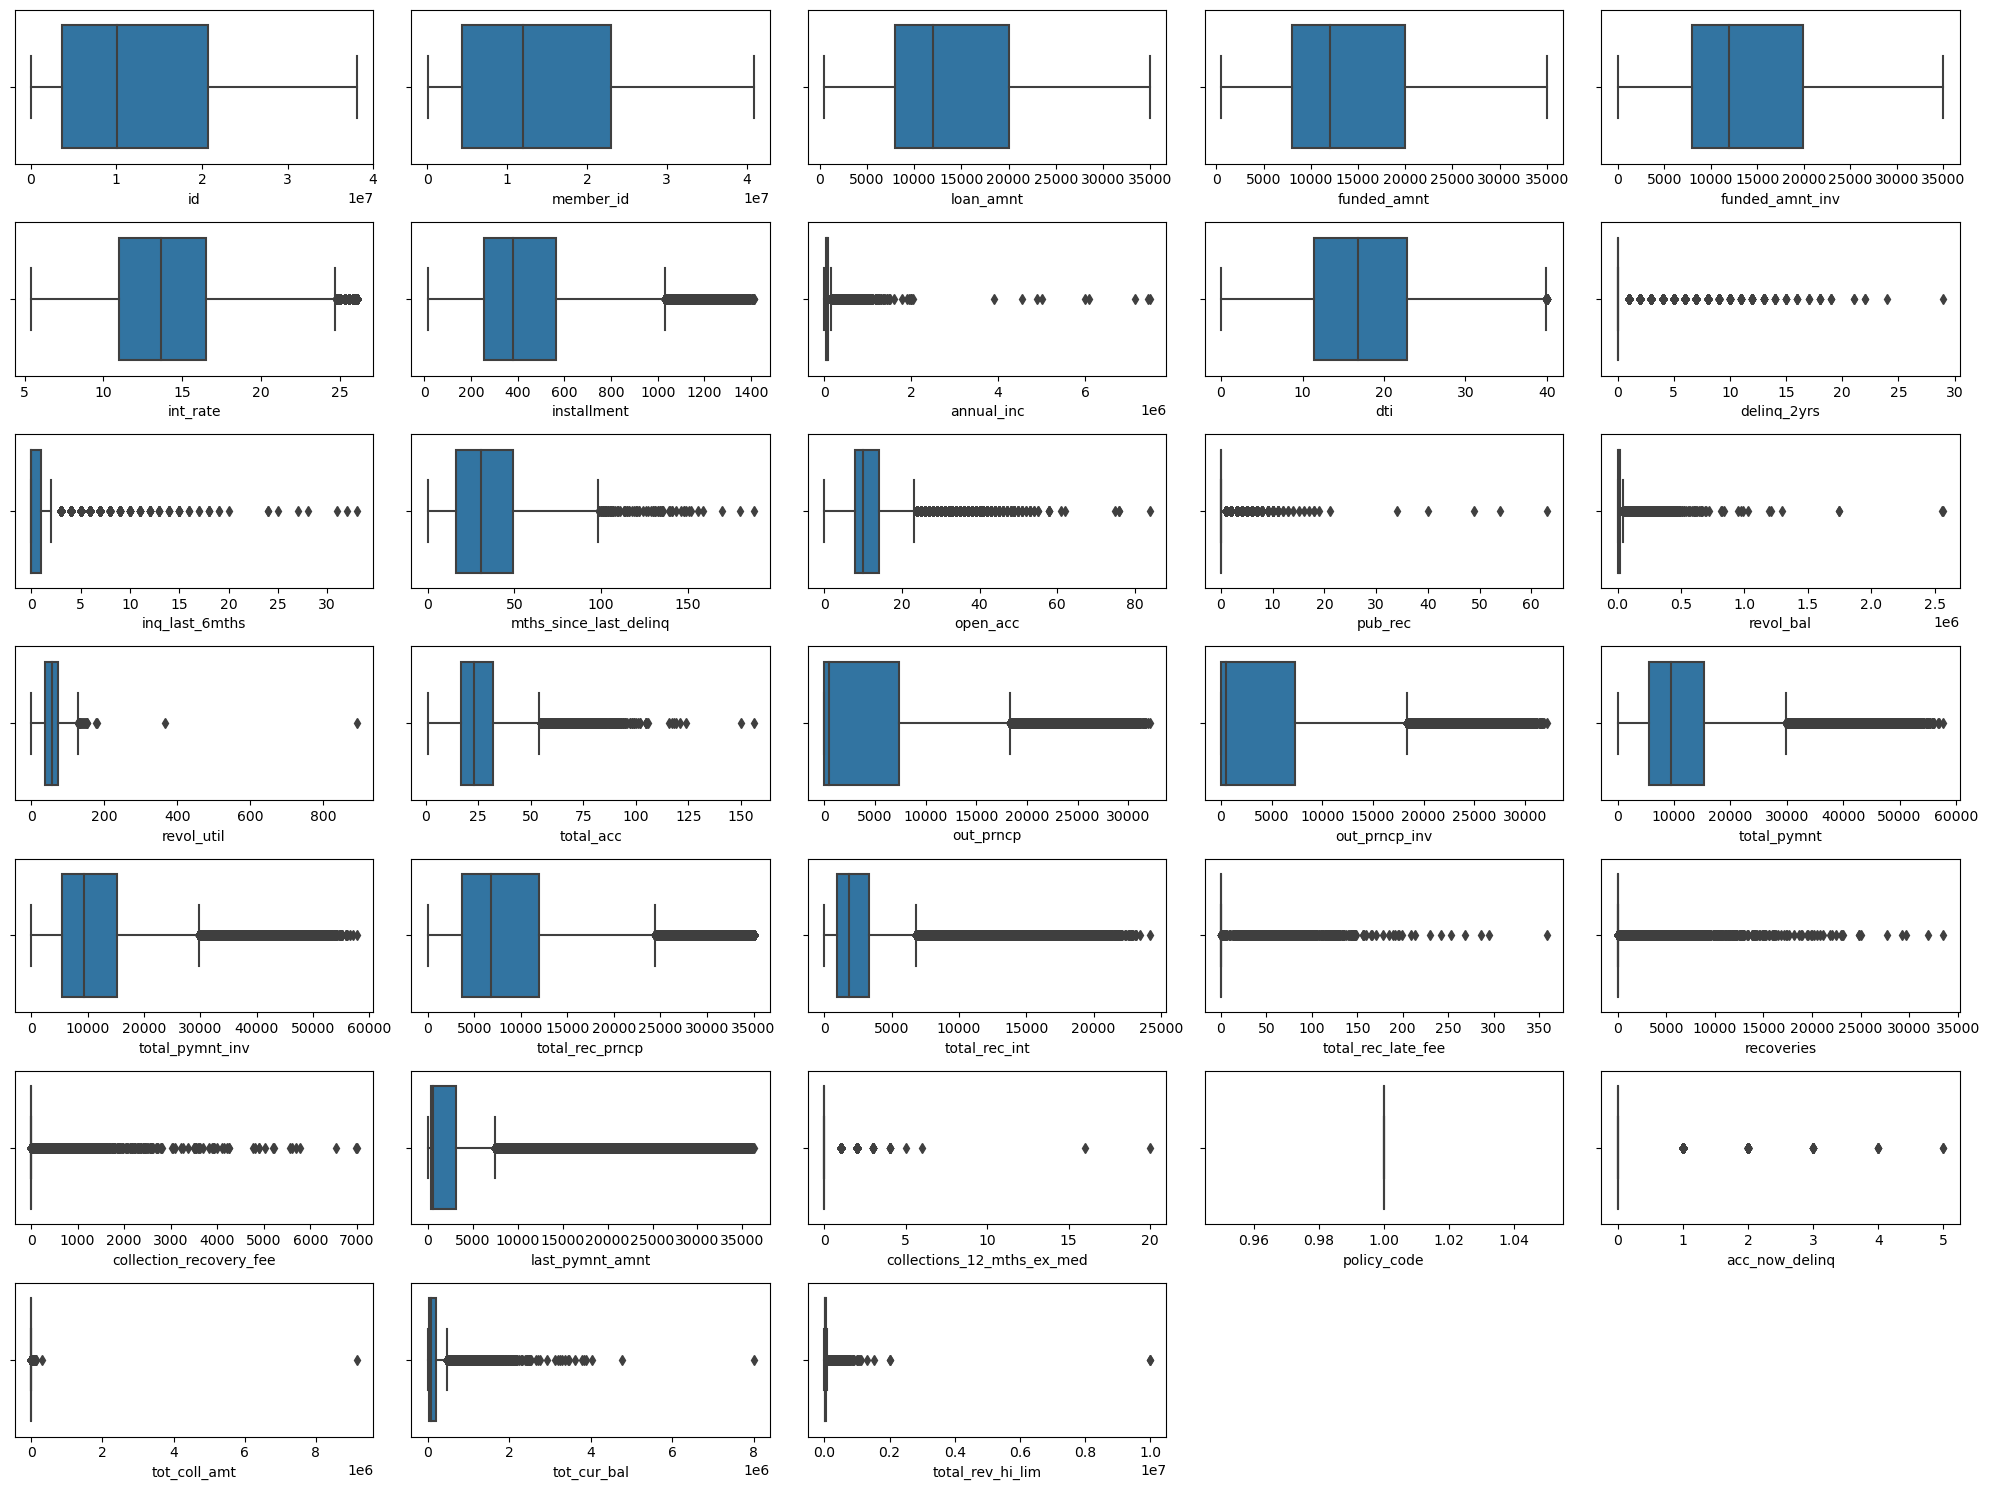

In [16]:
num = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

plt.figure(figsize=(20, 15))
for x in range(0, len(num)):
    plt.subplot(7, 5, x+1)
    sns.boxplot(df[num[x]])
    plt.tight_layout()

1.Revolve_utilization nilai presentase 200% akan dihilangkan dan diganti sampai 100%
2.total_acc & open_acc dibuatkan rasio
3.total_payment & total_payment_investor akan digabung
4.total_rec_prncpl & total_rc_int akan digabung
5.recoveries dihilangkan
6.revolve_balance dengan total_rev_hi_lim dibuatkan rasio
7.loan_amount & installment dibuatkan rasio -> berapa kali normalnya mereka mencicil
8.earliest_cr_line & next_pymnt_d akan disubstraksi untuk mendapatkan rentang tahun mereka bergabung

### Data Processing

In [57]:
df_a = df.copy()

In [58]:
cols_null = []

for x in df_a.columns:
    if df_a[x].isnull().values.any() == True:
        cols_null.append(x)

In [59]:
cols_null

['emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

##### Handling Missing Value Object Type

In [60]:
cols_null_obj = []

for x in df_a.select_dtypes(include='object').columns:
    if df_a[x].isnull().values.any() == True:
        cols_null_obj.append(x)

In [61]:
cols_null_obj

['emp_title',
 'emp_length',
 'desc',
 'title',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [62]:
for col in ['emp_title', 'emp_length', 'title']:
    mode_value = df_a[col].mode()[0]
    df_a[col].fillna(mode_value, inplace=True)

In [63]:
for col in ['earliest_cr_line', 'next_pymnt_d', 'last_pymnt_d']:
    mode_value = df_a[col].mode()[0]
    df_a[col].fillna(mode_value, inplace=True)

In [64]:
df_a.drop(['desc'], axis=1, inplace=True)

##### Handling missing value integer / float 

In [65]:
cols_null_int_all = []

for x in df.select_dtypes(exclude='object').columns:
    if df_a[x].isnull().values.any() == True:
        cols_null_int_all.append(x)
    

In [66]:
cols_null_int_all

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [67]:
# filter kolom dengan missing percentage < 1 %
cols_null = percentage_missing.apply(lambda row: row[percentage_missing['columns'].isin(cols_null_int_all)])
cols_null = cols_null[cols_null['missing_percentage'] < 1]
cols_null_int = cols_null['columns'].values
cols_null_int = list(cols_null_int)
cols_null_int

['annual_inc',
 'acc_now_delinq',
 'pub_rec',
 'delinq_2yrs',
 'open_acc',
 'inq_last_6mths',
 'total_acc',
 'collections_12_mths_ex_med',
 'revol_util']

In [68]:
# pada kolom dengan missing percentage dibawah 1 %, 
#fill missing value menggunakan nilai median pada kolom missing value
for col in cols_null_int:
    median_value = df_a[col].median()
    df_a[col].fillna(median_value, inplace=True)

In [69]:
percentage_missing

,columns,missing_percentage
0,id,0.0
1,zip_code,0.0
2,addr_state,0.0
3,dti,0.0
4,revol_bal,0.0
...,...,...
69,open_acc_6m,100.0
70,total_cu_tl,100.0
71,verification_status_joint,100.0
72,total_bal_il,100.0


In [70]:
# filter missing value yang lebih dari 1 %

cols_null_more_1 = percentage_missing.apply(lambda row : row[percentage_missing['columns'].isin(cols_null_int_all)])
cols_null_more_1 = cols_null_more_1[cols_null_more_1['missing_percentage'] > 1]
cols_null_more_1 = cols_null_more_1['columns'].values
cols_null_more_1 = list(cols_null_more_1)
cols_null_more_1

['tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal', 'mths_since_last_delinq']

In [71]:
#drop kolom loan status url dan zip code
variable_obj = df_a.select_dtypes(include='object').columns.tolist()

var = ['loan_status', 'url', 'zip_code']

for x in var:
    variable_obj.remove(x)

In [72]:
variable_obj

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

Pada kolom numerik yang memiliki presentase null values > 1 %, fill missing value akan dilakukan dengan bantuan kolom kategorik. Untuk memilih kolom kategorik mana yang cocok untuk mengisi null values pada kolom numerik, maka dilakukan hypothesis testing terlebih dahulu menggunakan ANOVA

##### temp 

In [203]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['term']==x][variable][df_a[df_a['term']==x][variable].notnull()] for x in df_a['term'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [124]:
temp_df

,Feature,P_Value
0,tot_coll_amt,2.640193e-01
1,total_rev_hi_lim,0.000000e+00
2,tot_cur_bal,0.000000e+00
3,mths_since_last_delinq,1.734854e-07


##### grade

In [125]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['grade']==x][variable][df_a[df_a['grade']==x][variable].notnull()] for x in df_a['grade'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [126]:
temp_df

,Feature,P_Value
0,tot_coll_amt,7.190124e-01
1,total_rev_hi_lim,0.000000e+00
2,tot_cur_bal,0.000000e+00
3,mths_since_last_delinq,1.131107e-139


##### home_ownership

In [132]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['home_ownership']==x][variable][df_a[df_a['home_ownership']==x][variable].notnull()] for x in df_a['home_ownership'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [128]:
temp_df

,Feature,P_Value
0,tot_coll_amt,8.083707e-01
1,total_rev_hi_lim,0.000000e+00
2,tot_cur_bal,0.000000e+00
3,mths_since_last_delinq,1.676585e-126


##### purpose

In [133]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['purpose']==x][variable][df_a[df_a['purpose']==x][variable].notnull()] for x in df_a['purpose'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [134]:
temp_df

,Feature,P_Value
0,tot_coll_amt,NaN
1,total_rev_hi_lim,NaN
2,tot_cur_bal,NaN
3,mths_since_last_delinq,7.016684e-10


##### verification_status

In [136]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['verification_status']==x][variable][df_a[df_a['verification_status']==x][variable].notnull()] for x in df_a['verification_status'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [137]:
temp_df

,Feature,P_Value
0,tot_coll_amt,5.439964e-01
1,total_rev_hi_lim,0.000000e+00
2,tot_cur_bal,0.000000e+00
3,mths_since_last_delinq,3.341255e-09


##### emp_length

In [138]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['emp_length']==x][variable][df_a[df_a['emp_length']==x][variable].notnull()] for x in df_a['emp_length'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [139]:
temp_df

,Feature,P_Value
0,tot_coll_amt,1.671843e-01
1,total_rev_hi_lim,0.000000e+00
2,tot_cur_bal,0.000000e+00
3,mths_since_last_delinq,3.950658e-85


##### pymnt_plan

In [155]:
temp_df = pd.DataFrame(columns=['Feature', 'P_Value'])

for variable in cols_null_more_1:
    groups = [df_a[df_a['pymnt_plan']==x][variable][df_a[df_a['pymnt_plan']==x][variable].notnull()] for x in df_a['pymnt_plan'].unique()]
    f_statistic, p_value = f_oneway(*groups)
    
    # buat dataframe sementara
    temp_df = temp_df.append({'Feature':variable, 'P_Value':p_value}, ignore_index=True)

In [156]:
temp_df

,Feature,P_Value
0,tot_coll_amt,0.981330
1,total_rev_hi_lim,0.746751
2,tot_cur_bal,0.501054
3,mths_since_last_delinq,0.178468


Berdasarkan pada percobaan diatas missing value pada kolom ***mths_since_last_delinq*** dapat diisi dengan ***grade*** sedangkan 3 kolom lainya memiliki p-value diatas 0.05.

In [73]:
# isi missing value pada kolom mths_since_last_delinq dengan grade

grade = df_a.groupby(['grade'])['mths_since_last_delinq'].median()
grade = dict(grade)

df_a['mths_since_last_deling_new'] = df_a['grade'].apply(lambda row: grade[row])

df_a['mths_since_last_delinq'] = df_a['mths_since_last_delinq'].fillna(df_a['mths_since_last_deling_new'], inplace=True)

del df_a['mths_since_last_delinq']

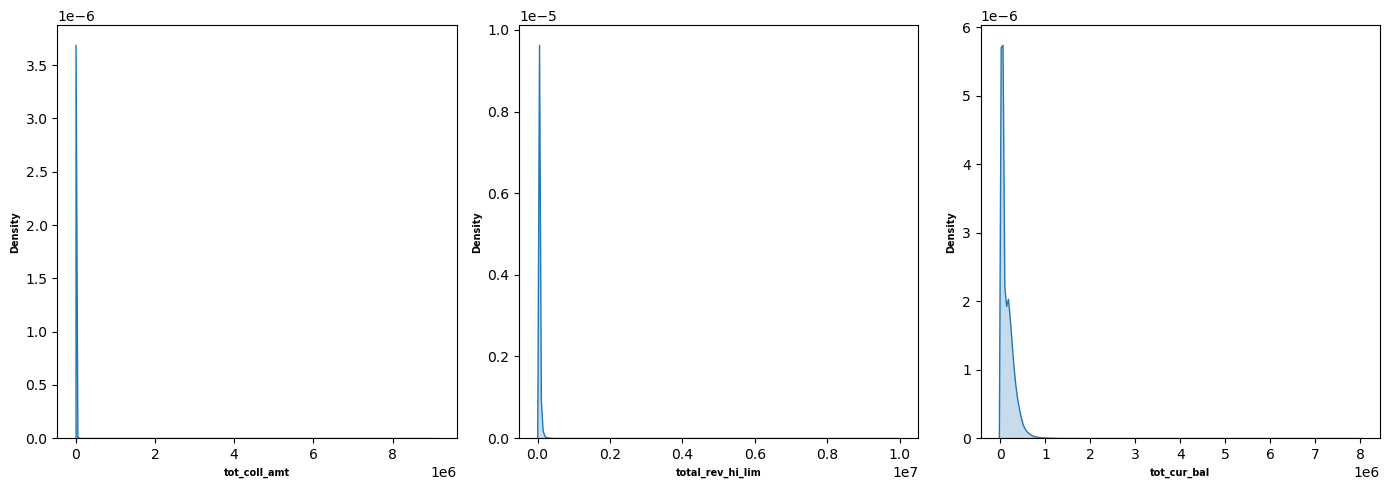

In [175]:
#buat visualisasi distribusi

cols = ['tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal']

plt.figure(figsize=(14, 5))

for x in range(0, len(cols)):
    plt.subplot(1,3, x+1)
    sns.kdeplot(data=df_a, x=cols[x], fill=True)
    plt.xlabel(cols[x], fontsize=7, fontweight='bold')
    plt.ylabel('Density', fontsize=7, fontweight='bold')
    plt.tight_layout()

ketiga kolom tersebut memiliki distribusi tidak normal, oleh karena itu fill missing value menggunakan median

In [74]:
for col in ['tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal']:
    median_value = df_a[col].median()
    df_a[col].fillna(median_value, inplace=True)

In [75]:
median_value = df_a['total_rev_hi_lim'].median()
df_a['total_rev_hi_lim'].replace(9999999.0, median_value, inplace=True)

In [26]:
x = df_a[df_a['term']==' 60 months']['tot_coll_amt']
x[x.notnull()]

1         0.0
4         0.0
6         0.0
8         0.0
9         0.0
         ... 
466272    0.0
466276    0.0
466280    0.0
466281    0.0
466282    0.0
Name: tot_coll_amt, Length: 128332, dtype: float64

In [76]:
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), Q3, df[col])

# Mengganti nilai outlier untuk setiap kolom
for col in ['tot_cur_bal', 'revol_bal']:
    replace_outliers(df_a, col)

### Feature Engineering

In [78]:
df_b = df_a.copy()
df_b.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_deling_new
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,32.0


In [79]:
df_b.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_last_deling_new'],
      dtype='object')

In [80]:
# pada kolom term ubah tipe data obj ke int64
def term_eng(df):
    if df == ' 36 months':
        hasil = 36
    else:
        hasil = 60
    
    return hasil

df_b['term'] = df_b['term'].apply(lambda x:term_eng(x))

In [81]:
#kolom next_pymnt_d menjadi datetime
df_b['next_pymnt_d'] = pd.to_datetime(df_b['next_pymnt_d'], format='%b-%y')
#kolom issue_d menjadi datetime
df_b['issue_d'] = pd.to_datetime(df_b['issue_d'], format='%b-%y')
#kolom last_pymnt_d menjadi datetime
df_b['last_pymnt_d'] = pd.to_datetime(df_b['last_pymnt_d'], format='%b-%y')
#kolom earliest_cr_line menjadi datetime
df_b['earliest_cr_line'] = pd.to_datetime(df_b['earliest_cr_line'], format='%b-%y')
df_b['last_credit_pull_d'] = pd.to_datetime(df_b['last_credit_pull_d'], format='%b-%y')

In [82]:
#buat kolom baru umur pinjaman
df_b['umur_pinjaman'] = ((df_b['next_pymnt_d'] - df_b['issue_d']) / np.timedelta64(1, 'M')).round()

In [83]:
#Noted = selisih terhitung hingga Juli 2022
df_b['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df_b['earliest_cr_line']) / np.timedelta64(1, 'M')))
df_b['months_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2022-07-01') - df_b['last_credit_pull_d']) / np.timedelta64(1, 'M')))      

In [84]:
#buat kolom baru untuk mengetahui apakah jadwal pembayaran melebihi / tidak melebihi masa cicilan
def term_umurpinjam(row):
    if row['umur_pinjaman'] == row['term']:
        hasil = 'tidak melebihi masa cicilan yang diberikan'
    elif row['umur_pinjaman'] > row['term']:
        hasil = 'melebihi masa cicilan yang diberikan'
    else:
        hasil = 'tidak melebihi masa cicilan yang diberikan'
        
    return hasil

df_b['terlambat/tidak'] = df_b.apply(term_umurpinjam, axis=1)

In [85]:
del df_b['total_pymnt_inv']

In [86]:
# membuat kolom baru rasio_payment_received
df_b['rasio_payment_received'] = (df_b['total_pymnt'] / ((((df_b['installment']*df_b['int_rate'])/100)+df_b['installment'])*df_b['term'])).round(2)

In [87]:
df_b[['total_pymnt', 'total_rec_prncp', 'out_prncp', 'funded_amnt', 'total_rec_int','installment', 'int_rate', 'term', 'rasio_payment_received']].sample(5)

,total_pymnt,total_rec_prncp,out_prncp,funded_amnt,total_rec_int,installment,int_rate,term,rasio_payment_received
448503,6682.410000,6000.00,0.00,6000,682.41,201.74,12.85,36,0.82
426800,4053.060000,3524.72,2475.28,6000,528.34,184.23,6.62,36,0.57
114747,12231.980000,12000.00,0.00,12000,231.98,365.23,6.03,36,0.88
187325,6985.915009,6000.00,0.00,6000,985.92,194.06,10.16,36,0.91
436392,17482.300000,7759.22,22240.78,30000,9723.08,794.65,19.99,60,0.31


In [88]:
#merubah nilai pada kolom revolve utilization > 100 menjadi 100 saja.
def revolve(df):
    if df > 100:
        hasil = 100
    else:
        hasil = df
        
    return hasil

df_b['revol_util'] = df_b['revol_util'].apply(lambda x:revolve(x))

In [89]:
# merubah nilai pada kolom loan status

# Definisi kategori untuk good loan dan bad loan
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_status = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

df_b['loan_category'] = df_b['loan_status'].apply(lambda x: 'Good' if x in good_loan_status else 'Bad')

In [90]:
#delinque
listk = df_b.columns.tolist()
listk = pd.Series(listk)
contains_deling = listk[listk.str.contains('deli')]
contains_deling

24                   delinq_2yrs
47                acc_now_delinq
51    mths_since_last_deling_new
dtype: object

In [91]:
# jumlahkan berapa kali konsumen delinque dalam 30 hari
df_b['total_number_delinque'] = df_b['delinq_2yrs'] + df_b['acc_now_delinq']

In [92]:
# rasio berapa kali debitur menggunakan kredit terhadap kepemilikan kredit
df_b['utilization_ratio'] = df_b['total_acc'] / df_b['open_acc']

In [93]:
# kelompokan value pada kolom purpose lebih sederhana

def purpose_credit(df):
    if df in ['credit_card', 'car', 'wedding', 'educational', 'vacation']:
        hasil = 'kredit_konsumen'
    elif df in ['small_business', 'debt_consolidation', 'renewable_energy']:
        hasil = 'kredit_bisnis'
    elif df in ['home_improvement', 'house', 'moving']:
        hasil = 'kredit_rumah'
    elif df in ['major_purchase', 'medical']:
        hasil = 'kredit_darurat'
    else:
        hasil = df
    
    return hasil

df_b['purpose'] = df_b['purpose'].apply(lambda row: purpose_credit(row))

In [94]:
def home_owner(df):
    if df in ['NONE', 'ANY']:
        hasil = 'OTHER'
    else:
        hasil = df
        
    return hasil

df_b['home_ownership'] = df_b['home_ownership'].apply( lambda row:home_owner(row))

In [95]:
df_b['loan_category'] = df_b['loan_category'].map({'Good':0,
                                                   'Bad':1})

In [96]:
#cek apakah ada nilai infinity di kolom utilization_ratio
df_b[['utilization_ratio', 'open_acc', 'total_acc']][np.isinf(df_b['utilization_ratio'])]

,utilization_ratio,open_acc,total_acc
103483,inf,0.0,19.0
148345,inf,0.0,10.0
169990,inf,0.0,5.0
414731,inf,0.0,15.0
426265,inf,0.0,3.0
428538,inf,0.0,6.0
464774,inf,0.0,6.0


In [97]:
# mengganti value inf menjadi nan dan dropna
df_b.replace([np.inf, -np.inf], np.nan, inplace=True)
df_b.dropna(inplace=True)

In [98]:
#cek kembali apakah ada nilai inf
df_b[np.isinf(df_b['utilization_ratio'])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rev_hi_lim,mths_since_last_deling_new,umur_pinjaman,months_since_earliest_cr_line,months_since_last_credit_pull_d,terlambat/tidak,rasio_payment_received,loan_category,total_number_delinque,utilization_ratio


In [99]:
df_b.isnull().values.any()

False

### Data Visualization

In [37]:
df_c = df_b.copy()
df_c.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_deling_new,umur_pinjaman,terlambat/tidak,rasio_payment_received,loan_category
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,INDIVIDUAL,0.0,0.0,81539.0,22800.0,32.0,50.0,melebihi masa cicilan yang diberikan,0.90,Good
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30.0,50.0,tidak melebihi masa cicilan yang diberikan,0.24,Bad


In [38]:
df_c['loan_categorys'] = df_c['loan_category']

In [39]:
def loanamnt(df):
    if df <= 5000:
        hasil = '0 - 5000'
    elif df > 5000 and df <= 10000:
        hasil = '5000 - 10000'
    elif df > 10000 and df <= 15000:
        hasil = '10000 - 15000'
    elif df > 15000 and df <= 20000:
        hasil = '15000 - 20000'
    elif df > 20000 and df <= 25000:
        hasil = '20000 - 25000'
    elif df > 25000 and df <= 30000:
        hasil = '25000 - 30000'
    else:
        hasil = '30000 - 35000'
        
    return hasil
        
df_c['kategori_loanamnt'] = df_c['loan_amnt'].apply(loanamnt)

In [49]:
def ratio(col): #col = kategori_loanamnt
    persentase = df_c.groupby([col, 'loan_category']).agg({'loan_categorys':'count'}).reset_index()
    persentase.columns = [col, 'loan_category', 'loan_categorys']
    persentase['rasio'] = persentase.groupby([col])['loan_categorys'].apply(lambda x:round(x/x.sum()*100,2)).astype(int)
    rasio = persentase.pivot_table(index=col, columns='loan_category', values='rasio')
    rasio = rasio.sort_values(by=['Bad'], ascending=False)
    return rasio

def visualisasi(col):
    fig, ax = plt.subplots(1,2, figsize=(17,9))
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.size'] = 11
    
    
    #persentase kategory pinjaman
    sns.countplot(y=col, data=df_c, order=df_c[col].value_counts(ascending=False).index, ax=ax[0], palette=["#7FFFD4"])
    for c in ax[0].containers:
        labels = [str(round(v.get_width(), 2)) if v.get_width() > 0 else '' for v in c]
        ax[0].bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 12)
    ax[0].set_title(f"Jumlah {col}", fontsize=20, fontweight='bold', pad=20)
    ax[0].set_ylabel(col, fontweight='bold')
    
    #persentase kategori pinjaman berdasarkan loan category
    ratio(col).plot(kind='barh', stacked=True, ax=ax[1], color = ['#E63946', '#A8DADC'])
    for c in ax[1].containers:
        labels = [str(round(v.get_width(), 2)) + "%" if v.get_width() > 0 else '' for v in c]
        ax[1].bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 12) # add a container object "c" as first argument
        ax[1].set_title(f"Persentase {col} Berdasarkan Loan Category", fontsize=20, fontweight='bold', pad=20)
    ax[1].set_ylabel(col, fontweight='bold')
    ax[1].legend('')
    plt.tight_layout()

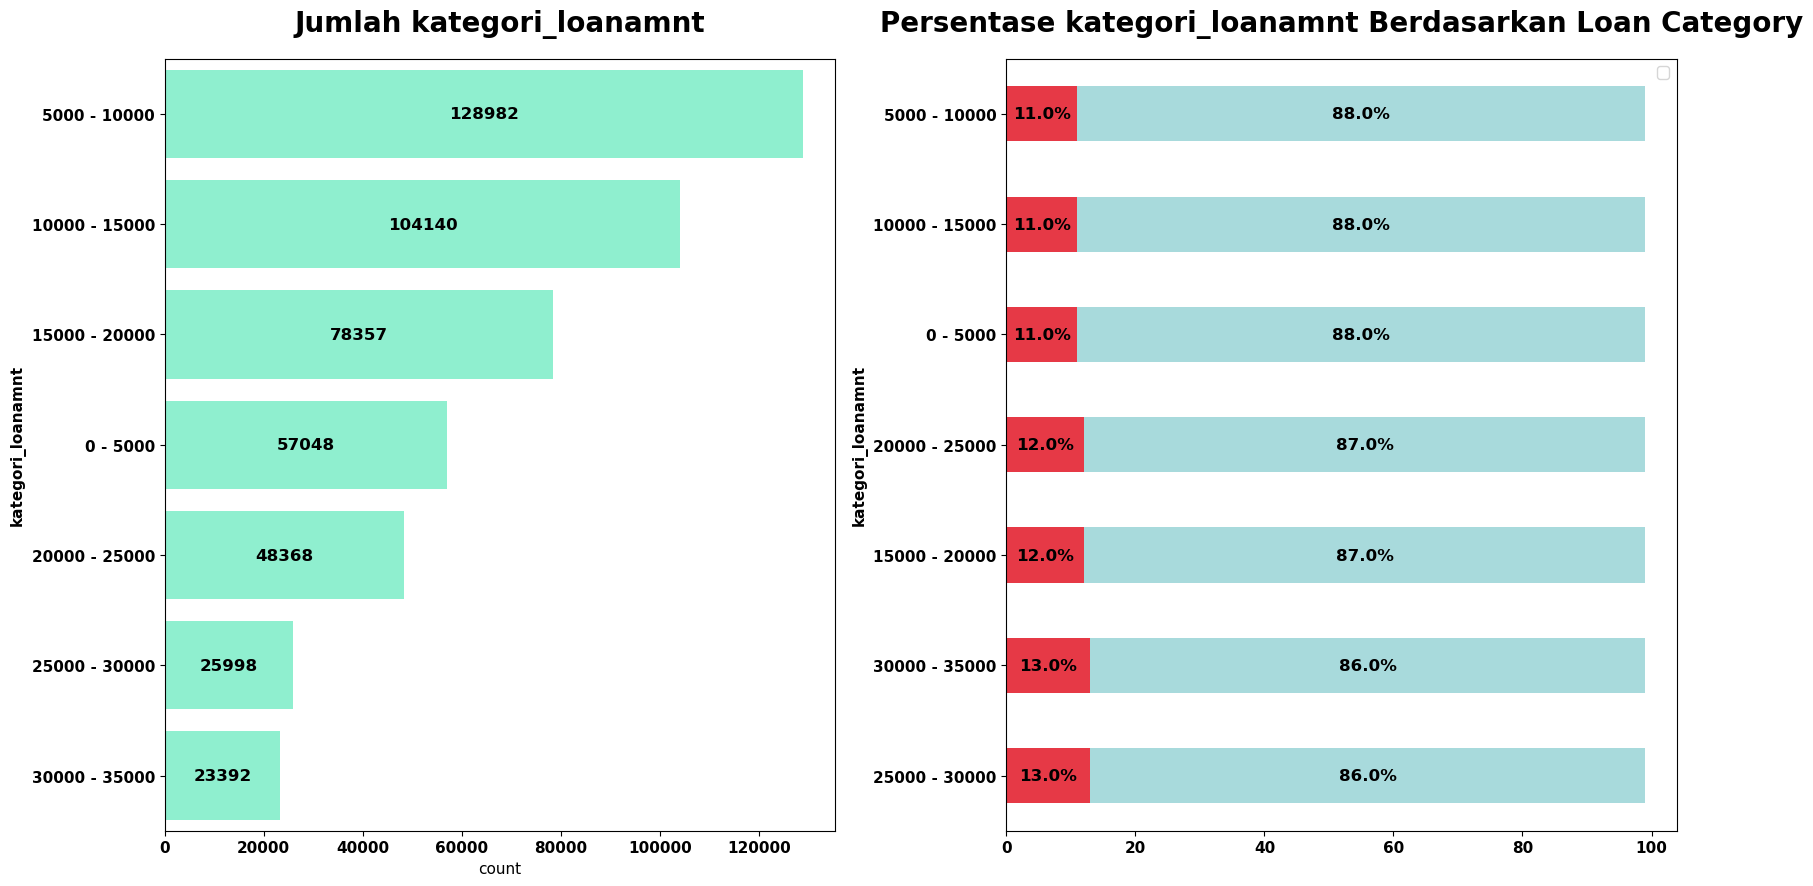

In [50]:
visualisasi('kategori_loanamnt')

In [51]:
ratio('kategori_loanamnt')

loan_category,Bad,Good
kategori_loanamnt,,
25000 - 30000,13,86
30000 - 35000,13,86
15000 - 20000,12,87
20000 - 25000,12,87
0 - 5000,11,88
10000 - 15000,11,88
5000 - 10000,11,88


In [ ]:
1.Revolve_utilization nilai presentase 200% akan dihilangkan dan diganti sampai 100%
2.total_acc & open_acc dibuatkan rasio
3.total_payment & total_payment_investor akan digabung
4.total_rec_prncpl & total_rc_int akan digabung
5.recoveries dihilangkan
6.revolve_balance dengan total_rev_hi_lim dibuatkan rasio
7.loan_amount & installment dibuatkan rasio -> berapa kali normalnya mereka mencicil
8.earliest_cr_line & next_pymnt_d akan disubstraksi untuk mendapatkan rentang tahun mereka bergabung

### Data Processing Pt.II

In [100]:
df_d = df_b.copy()
df_d.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rev_hi_lim,mths_since_last_deling_new,umur_pinjaman,months_since_earliest_cr_line,months_since_last_credit_pull_d,terlambat/tidak,rasio_payment_received,loan_category,total_number_delinque,utilization_ratio
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,22800.0,32.0,50.0,450.0,78.0,melebihi masa cicilan yang diberikan,0.9,0,0.0,3.0


In [101]:
df_d.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_last_deling_new',
       'umur_pinjaman', 'months_since_earliest_cr_line',
       'months_since_last_credit_pull_d', 'terla

In [102]:
#### hapus kolom

del_list = ['next_pymnt_d', 'issue_d', 'umur_pinjaman', 'funded_amnt', 'funded_amnt_inv', 
            'total_pymnt', 'int_rate', 'term', 'url', 'title', 'zip_code', 'revol_bal', 
            'loan_status', 'id', 'member_id', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
            'last_pymnt_amnt', 'delinq_2yrs', 'acc_now_delinq', 'policy_code', 'out_prncp',
           'out_prncp_inv', 'installment', 'total_acc', 'open_acc', 'tot_cur_bal', 'annual_inc',
            'pymnt_plan', 'emp_title', 'addr_state', 'sub_grade', 'earliest_cr_line','last_credit_pull_d'
           ]

for x in del_list:
    df_d.drop(x, axis=1, inplace=True)


In [103]:
df_d.head(1)

,loan_amnt,grade,emp_length,home_ownership,verification_status,purpose,dti,inq_last_6mths,pub_rec,revol_util,...,tot_coll_amt,total_rev_hi_lim,mths_since_last_deling_new,months_since_earliest_cr_line,months_since_last_credit_pull_d,terlambat/tidak,rasio_payment_received,loan_category,total_number_delinque,utilization_ratio
0,5000,B,10+ years,RENT,Verified,kredit_konsumen,27.65,1.0,0.0,83.7,...,0.0,22800.0,32.0,450.0,78.0,melebihi masa cicilan yang diberikan,0.9,0,0.0,3.0


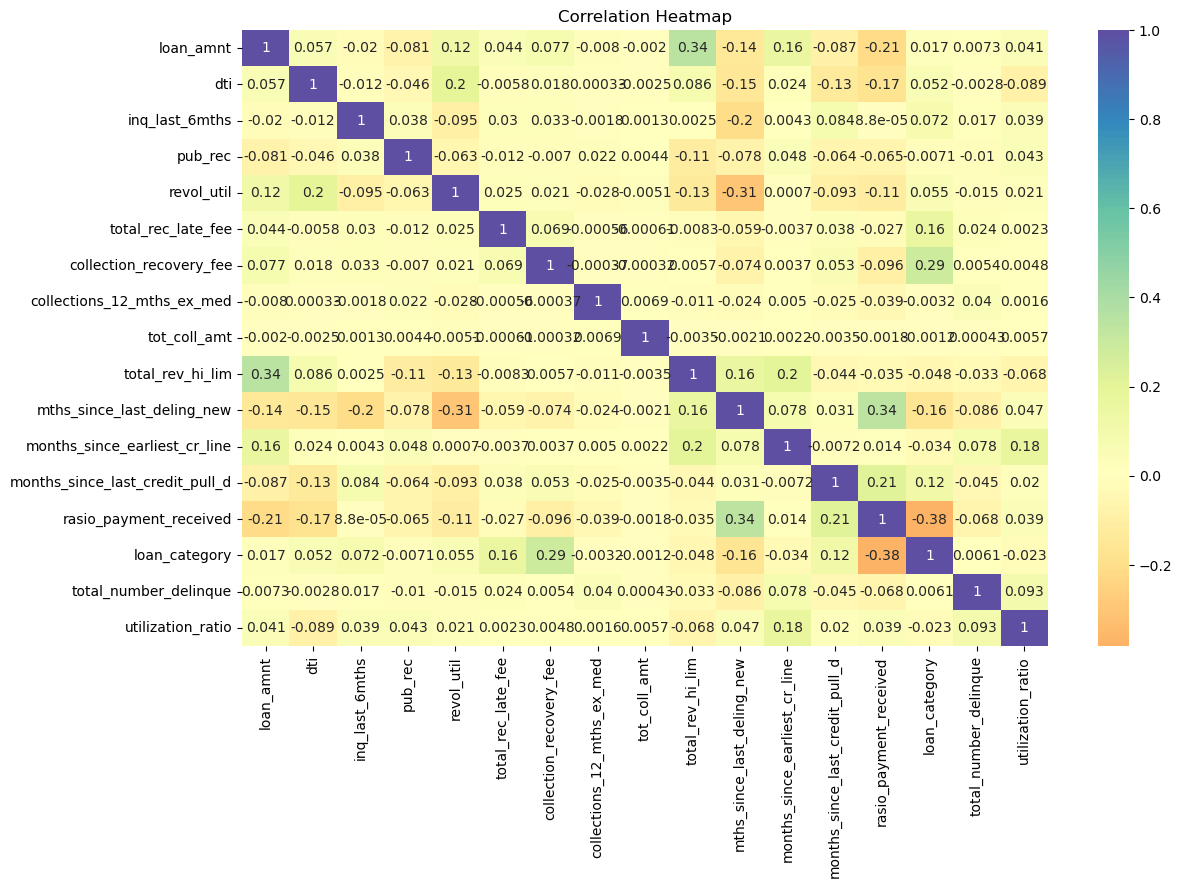

In [104]:
correlation_matrix = df_d.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Feature Encoding

In [105]:
df_d.select_dtypes(include='object').columns

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type',
       'terlambat/tidak'],
      dtype='object')

In [106]:
df_d['grade'] = df_d['grade'].map({'A':6,
                                   'B':5,
                                   'C':4,
                                   'D':3,
                                   'E':2,
                                   'F':1,
                                   'G':0})

df_d['emp_length'] = df_d['emp_length'].map({'< 1 year':0,
                                             '1 year':1,
                                             '2 years':2,
                                             '3 years':3,
                                             '4 years':4,
                                             '5 years':5,
                                             '6 years':6,
                                             '7 years':7,
                                             '8 years':8,
                                             '9 years':9,
                                             '10+ years':10})


In [107]:
def nominal(df,col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    return df

In [108]:
df_d = nominal(df_d, 'home_ownership')
df_d = nominal(df_d, 'verification_status')
df_d = nominal(df_d, 'purpose')
df_d = nominal(df_d, 'initial_list_status')
df_d = nominal(df_d, 'application_type')
df_d = nominal(df_d, 'terlambat/tidak')

In [109]:
df_d.head(1)

,loan_amnt,grade,emp_length,home_ownership,verification_status,purpose,dti,inq_last_6mths,pub_rec,revol_util,...,purpose_kredit_bisnis,purpose_kredit_darurat,purpose_kredit_konsumen,purpose_kredit_rumah,purpose_other,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,terlambat/tidak_melebihi masa cicilan yang diberikan,terlambat/tidak_tidak melebihi masa cicilan yang diberikan
0,5000,5,10,RENT,Verified,kredit_konsumen,27.65,1.0,0.0,83.7,...,0,0,1,0,0,1,0,1,1,0


In [110]:
df_d.drop(['home_ownership', 'verification_status', 'purpose',
           'initial_list_status', 'application_type', 'terlambat/tidak'], axis=1, inplace=True)

In [111]:
df_d.head(1)

,loan_amnt,grade,emp_length,dti,inq_last_6mths,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,...,purpose_kredit_bisnis,purpose_kredit_darurat,purpose_kredit_konsumen,purpose_kredit_rumah,purpose_other,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,terlambat/tidak_melebihi masa cicilan yang diberikan,terlambat/tidak_tidak melebihi masa cicilan yang diberikan
0,5000,5,10,27.65,1.0,0.0,83.7,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,1,0


## Split Dataset (Dataset Based)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
df_e = df_d.copy()
df_e.head(1)

,loan_amnt,grade,emp_length,dti,inq_last_6mths,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,...,purpose_kredit_bisnis,purpose_kredit_darurat,purpose_kredit_konsumen,purpose_kredit_rumah,purpose_other,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,terlambat/tidak_melebihi masa cicilan yang diberikan,terlambat/tidak_tidak melebihi masa cicilan yang diberikan
0,5000,5,10,27.65,1.0,0.0,83.7,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,1,0


In [114]:
df_e.columns

Index(['loan_amnt', 'grade', 'emp_length', 'dti', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'total_rec_late_fee', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'total_rev_hi_lim',
       'mths_since_last_deling_new', 'months_since_earliest_cr_line',
       'months_since_last_credit_pull_d', 'rasio_payment_received',
       'loan_category', 'total_number_delinque', 'utilization_ratio',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_kredit_bisnis', 'purpose_kredit_darurat',
       'purpose_kredit_konsumen', 'purpose_kredit_rumah', 'purpose_other',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_INDIVIDUAL',
       'terlambat/tidak_melebihi masa cicilan yang diberikan',
       'terlambat/tidak_tidak melebihi masa cicilan yan

In [115]:
X = df_e.drop(['loan_category'], axis=1)
y = df_e['loan_category']

#split x y train and x y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Modelling

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate

#### Tanpa Scalling

In [117]:
def modelling(x_train, x_test, y_train, y_test):
    models = [
             ('LogisticRegression',LogisticRegression()),
            ('DecisionTreeClassifier',DecisionTreeClassifier()),
            ('RandomForestClassifier',RandomForestClassifier()),
            ('AdaBoostClassifier',AdaBoostClassifier()),
            ('XGBClassifier',XGBClassifier()),
            ('GradientBoostingClassifier',GradientBoostingClassifier()),
            ('LGBMClassifier',LGBMClassifier(verbose=-1))
            ]
    
    #modelling
    accuracy_tr = []
    accuracy_ts = []
    precision_tr = []
    precision_ts = []
    recall_tr = []
    recall_ts = []
    AUC_train = []
    AUC_test = []
    nama_mdl = []
    
    for nama_model, fungsi_model in models:
        fungsi_model.fit(x_train, y_train)
        y_pred_train = fungsi_model.predict(x_train)
        y_pred_test = fungsi_model.predict(x_test)
        y_pred_proba_test = fungsi_model.predict_proba(x_test)
        y_pred_proba_train = fungsi_model.predict_proba(x_train)
        
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_train = precision_score(y_train, y_pred_train)
        precision_test = precision_score(y_test, y_pred_test)
        recall_train =  recall_score(y_train, y_pred_train)
        recall_test = recall_score(y_test, y_pred_test)
        AUC_train_proba = roc_auc_score(y_train, y_pred_proba_train[:, 1])
        AUC_test_proba = roc_auc_score(y_test, y_pred_proba_test[:, 1])
        
        nama_mdl.append(nama_model)
        accuracy_tr.append(accuracy_train)
        accuracy_ts.append(accuracy_test)
        precision_tr.append(precision_train)
        precision_ts.append(precision_test)
        recall_tr.append(recall_train)
        recall_ts.append(recall_test)
        AUC_train.append(AUC_train_proba)
        AUC_test.append(AUC_test_proba)
        
    df_evaluasi = pd.DataFrame({'Model':nama_mdl,
                                'Accuracy_train':accuracy_tr,
                                'Accuracy_test':accuracy_ts,
                                'Precision_Train':precision_tr,
                                'Precision_Test':precision_ts,
                                'Recall_Train':recall_tr,
                                'Recall_Test':recall_ts,
                                'AUC_Train':AUC_train,
                                'AUC_test':AUC_test})
    
    df_evaluasi.sort_values(by=['AUC_test'], ascending=False, inplace=True)
    return df_evaluasi

In [118]:
modelling(x_train, x_test, y_train, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.960281,0.959856,0.964230,0.959300,0.691001,0.690726,0.953619,0.947085
4,XGBClassifier,0.962205,0.959656,0.970726,0.957514,0.702772,0.690364,0.960972,0.946652
5,GradientBoostingClassifier,0.956368,0.956967,0.964470,0.965788,0.656590,0.660456,0.940704,0.940540
2,RandomForestClassifier,0.999972,0.956567,1.000000,0.970201,0.999768,0.653763,1.000000,0.933849
3,AdaBoostClassifier,0.950865,0.951162,0.960039,0.963943,0.611493,0.610950,0.932233,0.932483
1,DecisionTreeClassifier,1.000000,0.924766,1.000000,0.672452,1.000000,0.712554,1.000000,0.832933
0,LogisticRegression,0.920148,0.920098,0.987240,0.985284,0.331535,0.331042,0.762412,0.763360


#### Modelling dengan Scalling MinMaxScaller

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_mm = scaler.fit_transform(x_train)
x_test_mm = scaler.transform(x_test)

In [130]:
modelling(x_train_mm, x_test_mm, y_train, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.960192,0.959806,0.963691,0.959122,0.690640,0.690425,0.953835,0.947244
4,XGBClassifier,0.962205,0.959656,0.970726,0.957514,0.702772,0.690364,0.960972,0.946652
5,GradientBoostingClassifier,0.956160,0.956703,0.963181,0.964034,0.655713,0.659431,0.940427,0.940289
2,RandomForestClassifier,0.999963,0.956839,1.000000,0.973682,0.999690,0.653642,1.000000,0.934850
3,AdaBoostClassifier,0.950865,0.951162,0.960039,0.963943,0.611493,0.610950,0.932233,0.932483
0,LogisticRegression,0.930149,0.931265,0.926435,0.929610,0.447003,0.454715,0.899642,0.900391
1,DecisionTreeClassifier,1.000000,0.924788,1.000000,0.671941,1.000000,0.714484,1.000000,0.833780


#### StandardScaler

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_ss = scaler.fit_transform(x_train)
x_test_ss = scaler.transform(x_test)

In [132]:
modelling(x_train_ss, x_test_ss, y_train, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.960342,0.959706,0.964223,0.958459,0.691543,0.690063,0.953796,0.946961
4,XGBClassifier,0.962321,0.959541,0.972346,0.956006,0.702540,0.690545,0.960753,0.946614
5,GradientBoostingClassifier,0.956368,0.956967,0.964470,0.965788,0.656590,0.660456,0.940704,0.940540
2,RandomForestClassifier,0.999966,0.956925,1.000000,0.971342,0.999716,0.656054,1.000000,0.935411
3,AdaBoostClassifier,0.950865,0.951162,0.960039,0.963943,0.611493,0.610950,0.932233,0.932483
0,LogisticRegression,0.942601,0.942740,0.969359,0.969246,0.533275,0.534009,0.915883,0.916333
1,DecisionTreeClassifier,1.000000,0.923758,1.000000,0.666685,1.000000,0.713881,1.000000,0.832935


### Handling Imbalance

### Undersampling

In [119]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomOverSampler(random_state=123)

x_under, y_under = under_sampler.fit_resample(x_train.values, y_train.ravel())
Counter(y_under)

Counter({0: 287627, 1: 287627})

In [120]:
modelling(x_under, x_test, y_under, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.873478,0.931036,0.941779,0.680790,0.796177,0.787687,0.954125,0.946702
4,XGBClassifier,0.889593,0.929442,0.944480,0.672844,0.827850,0.788109,0.965929,0.945567
5,GradientBoostingClassifier,0.861819,0.917045,0.922591,0.617827,0.789915,0.787446,0.941593,0.940904
2,RandomForestClassifier,1.000000,0.958462,1.000000,0.945280,1.000000,0.689580,1.000000,0.940512
3,AdaBoostClassifier,0.850002,0.891979,0.892859,0.529511,0.795457,0.797938,0.932666,0.932761
1,DecisionTreeClassifier,1.000000,0.928141,1.000000,0.692113,1.000000,0.709600,1.000000,0.833569
0,LogisticRegression,0.732224,0.906078,0.925331,0.628037,0.505217,0.509768,0.795186,0.796382


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_mm3 = scaler.fit_transform(x_under)
x_test_mm3 = scaler.transform(x_test)

In [129]:
modelling(x_train_mm3, x_test_mm3, y_under, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.864193,0.921506,0.931100,0.637777,0.786592,0.778691,0.948252,0.940176
4,XGBClassifier,0.879383,0.918497,0.933158,0.625451,0.817310,0.775246,0.959025,0.938091
5,GradientBoostingClassifier,0.851818,0.907116,0.910795,0.579801,0.780034,0.780262,0.935507,0.934815
2,RandomForestClassifier,1.000000,0.954948,1.000000,0.932534,1.000000,0.667432,1.000000,0.933559
3,AdaBoostClassifier,0.844882,0.889137,0.889787,0.520758,0.787280,0.787635,0.929592,0.929681
0,LogisticRegression,0.828973,0.844207,0.840697,0.418581,0.811768,0.814951,0.920783,0.922136
1,DecisionTreeClassifier,1.000000,0.922400,1.000000,0.666006,1.000000,0.690034,1.000000,0.821804


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_ss3 = scaler.fit_transform(x_under)
x_test_ss3 = scaler.transform(x_test)

In [122]:
modelling(x_train_ss3, x_test_ss3, y_under, y_test)

,Model,Accuracy_train,Accuracy_test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,AUC_Train,AUC_test
6,LGBMClassifier,0.873736,0.931380,0.942072,0.681927,0.796445,0.789496,0.954124,0.946978
4,XGBClassifier,0.889593,0.929442,0.944480,0.672844,0.827850,0.788109,0.965929,0.945567
2,RandomForestClassifier,1.000000,0.958076,1.000000,0.944076,1.000000,0.687108,1.000000,0.940981
5,GradientBoostingClassifier,0.861819,0.917045,0.922591,0.617827,0.789915,0.787446,0.941593,0.940904
3,AdaBoostClassifier,0.850002,0.891979,0.892859,0.529511,0.795457,0.797938,0.932666,0.932761
0,LogisticRegression,0.824896,0.832438,0.830416,0.399389,0.816544,0.820188,0.918308,0.919149
1,DecisionTreeClassifier,1.000000,0.928191,1.000000,0.692989,1.000000,0.708032,1.000000,0.832919


Berdasarkan pemodelan, maka modelling yang memiliki nilai akurasi yang tinggi adalah :
- > ***Logistic Regression***
- > ***XGboost classifier***
- > ***Gradient Boosting Classifier***

### Hyperparamete Tuning

In [125]:
def eval_classification(model):
    y_pred = model.predict(x_test_ss3)
    y_pred_train = model.predict(x_train_ss3)
    y_pred_proba = model.predict_proba(x_test_ss3)
    y_pred_proba_train = model.predict_proba(x_train_ss3)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_under, y_pred_proba_train[:, 1]))

##### Logistic Regression

In [123]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train_ss3, y_under)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train_ss3)
        train_auc = roc_auc_score(y_under, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test_ss3)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.9009361875200795; test: 0.9018861648384503
param value: 0.0006040404040404041; train: 0.9053397718011529; test: 0.9061521781419736
param value: 0.0011080808080808082; train: 0.9065884712350561; test: 0.9073223746695529
param value: 0.0016121212121212123; train: 0.9073186124362639; test: 0.9080077902774997
param value: 0.002116161616161616; train: 0.9078354783662926; test: 0.9084989969302467
param value: 0.0026202020202020205; train: 0.9082362311776313; test: 0.9088857871317254
param value: 0.0031242424242424243; train: 0.9085653794711606; test: 0.9092081038219737
param value: 0.003628282828282828; train: 0.908844747620997; test: 0.9094856849280387
param value: 0.004132323232323233; train: 0.9090874522752495; test: 0.9097297703473701
param value: 0.004636363636363637; train: 0.9093036326601642; test: 0.9099504012050118
param value: 0.0051404040404040416; train: 0.909499325960313; test: 0.9101516267203617
param value: 0.005644444444444445; train: 0.909675989

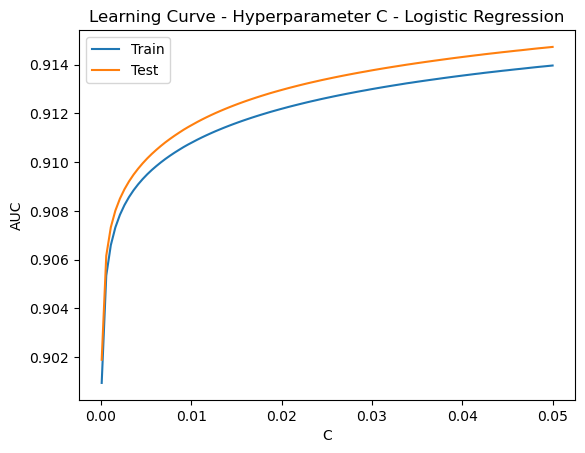

In [124]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

In [126]:
logreg = LogisticRegression(penalty='l2', C=0.05) # inisiasi object dengan nama logreg
logreg.fit(x_train_ss3, y_under) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.38
Recall (Test Set): 0.82
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91


#### Adaboost

In [134]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(learning_rate = c)
        model.fit(x_train_ss3, y_under)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train_ss3)
        train_auc = roc_auc_score(y_under, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test_ss3)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - AdaBoost Classifier')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.7101071874337249; test: 0.7092981186685963
param value: 0.003664285714285714; train: 0.8857363360727946; test: 0.8848645902786079
param value: 0.007228571428571429; train: 0.887767904211556; test: 0.8868704218999222
param value: 0.010792857142857142; train: 0.8893376223032716; test: 0.8882235104527534
param value: 0.014357142857142857; train: 0.8998532606839207; test: 0.8985085064479047
param value: 0.01792142857142857; train: 0.9003363448788243; test: 0.8990131050171072
param value: 0.021485714285714285; train: 0.901065750149636; test: 0.8997731125383746
param value: 0.02505; train: 0.9010666170614519; test: 0.8997823838275287
param value: 0.028614285714285714; train: 0.9010666170614519; test: 0.8997823838275287
param value: 0.03217857142857143; train: 0.9013596844039748; test: 0.9001088402197922
param value: 0.035742857142857146; train: 0.9013588174921591; test: 0.900099568930638
param value: 0.03930714285714286; train: 0.9063563117152791; test: 0.905537

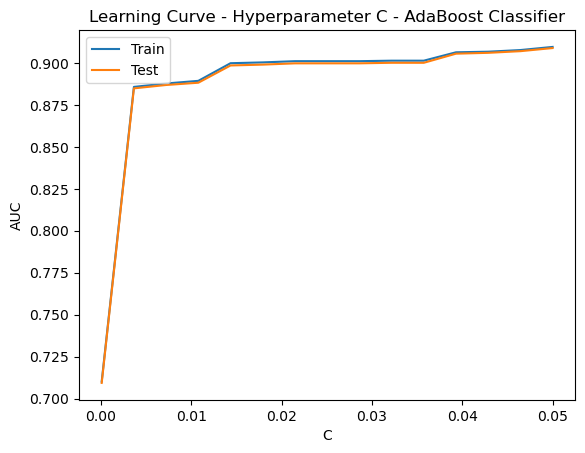

In [135]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 15)]
draw_learning_curve(param_values)

In [130]:
adaboost = AdaBoostClassifier(learning_rate = 0.05) # inisiasi object dengan nama logreg
adaboost.fit(x_train_ss3, y_under) # fit model regression dari data train
eval_classification(adaboost)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.44
Recall (Test Set): 0.78
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91


#### XGBoost Classifier

In [131]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = XGBClassifier(learning_rate = c)
        model.fit(x_train_ss3, y_under)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train_ss3)
        train_auc = roc_auc_score(y_under, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test_ss3)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - AdaBoost Classifier')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.9234970715616175; test: 0.9237484486437353
param value: 0.003664285714285714; train: 0.9308363853187392; test: 0.9308738960646268
param value: 0.007228571428571429; train: 0.9338133826752857; test: 0.9336716423126393
param value: 0.010792857142857142; train: 0.9347478942484533; test: 0.934644352457892
param value: 0.014357142857142857; train: 0.9361479598832402; test: 0.9360100652922175
param value: 0.01792142857142857; train: 0.9371499699919784; test: 0.9369062682272342
param value: 0.021485714285714285; train: 0.9381055462385672; test: 0.9379624759762781
param value: 0.02505; train: 0.9390456457479263; test: 0.9387492035035292
param value: 0.028614285714285714; train: 0.9398545970103714; test: 0.9394455579708122
param value: 0.03217857142857143; train: 0.9406352174063484; test: 0.9401896562024821
param value: 0.035742857142857146; train: 0.9416547693370966; test: 0.941157693042825
param value: 0.03930714285714286; train: 0.9422747421339143; test: 0.94178

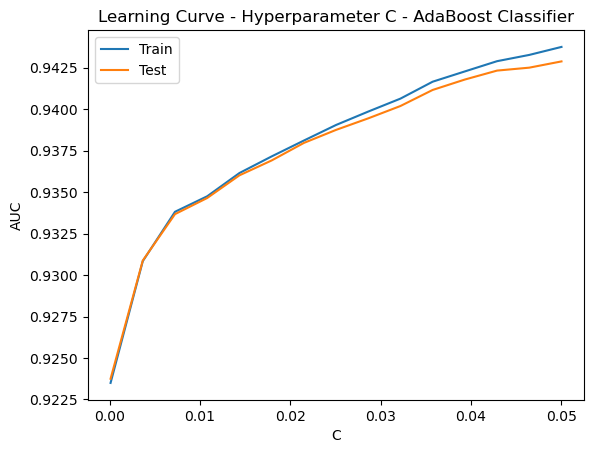

In [132]:
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 15)]
draw_learning_curve(param_values)

In [133]:
xg = XGBClassifier(learning_rate = 0.05) # inisiasi object dengan nama logreg
xg.fit(x_train_ss3, y_under) # fit model regression dari data train
eval_classification(xg)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.67
Recall (Test Set): 0.78
F1-Score (Test Set): 0.72
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.94


#### Gradient Boosting

In [136]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = GradientBoostingClassifier(learning_rate = c)
        model.fit(x_train_ss3, y_under)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train_ss3)
        train_auc = roc_auc_score(y_under, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test_ss3)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - AdaBoost Classifier')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.8926271096334079; test: 0.8918985404541482
param value: 0.003664285714285714; train: 0.8978712929822475; test: 0.8970433669118336
param value: 0.007228571428571429; train: 0.914806749715647; test: 0.9137757519349067
param value: 0.010792857142857142; train: 0.9176119605706287; test: 0.9169767095121522
param value: 0.014357142857142857; train: 0.924562351226139; test: 0.9239556007705183
param value: 0.01792142857142857; train: 0.9276102377734421; test: 0.9271258977015229
param value: 0.021485714285714285; train: 0.9295959920541579; test: 0.9291496588202761
param value: 0.02505; train: 0.9315881160679249; test: 0.9312234913076098
param value: 0.028614285714285714; train: 0.9327825067504937; test: 0.9324115388328446
param value: 0.03217857142857143; train: 0.9338220782713702; test: 0.9334356976388412
param value: 0.035742857142857146; train: 0.9345874391808606; test: 0.9342245003971473
param value: 0.03930714285714286; train: 0.9353258745725619; test: 0.93498

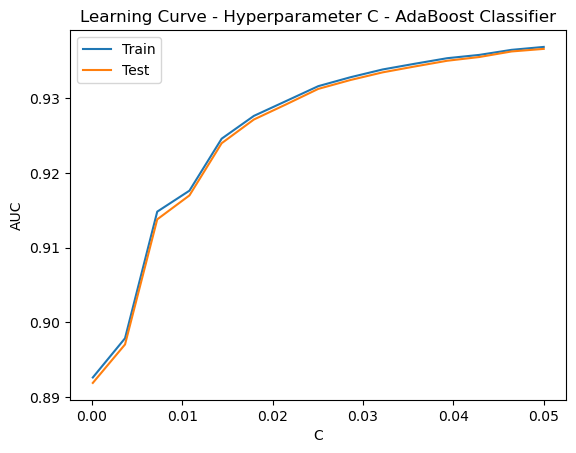

In [137]:
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 15)]
draw_learning_curve(param_values)

In [138]:
gradient = GradientBoostingClassifier(learning_rate = 0.05) # inisiasi object dengan nama logreg
gradient.fit(x_train_ss3, y_under) # fit model regression dari data train
eval_classification(gradient)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.59
Recall (Test Set): 0.79
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.94


#### Model Evaluation

In [139]:
def classification_eval(aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn)/(tp+tn+fp+fn) *100,2)
    precision = round((tp)/(tp+fp)*100, 2)
    recall = round((tp)/(tp+fn)*100, 2)
    
    print("evaluation model", name)
    print(cm)
    print("accuracy:", accuracy, "%")
    print("precision:", precision, "%")
    print("recall:", recall, "%")

In [140]:
logreg = LogisticRegression(penalty='l2', C=0.05) # inisiasi object dengan nama logreg
logreg.fit(x_train_ss3, y_under) 

LogisticRegression(C=0.05)

In [142]:
y_pred_train_log = logreg.predict(x_train_ss3)
y_pred_test_log = logreg.predict(x_test_ss3)

In [144]:
classification_eval(y_under, y_pred_train_log, 'Log Training')

evaluation model Log Training
[[236670  50957]
 [ 52299 235328]]
accuracy: 82.05 %
precision: 82.2 %
recall: 81.82 %


In [145]:
classification_eval(y_test, y_pred_test_log, 'Log Testing')

evaluation model Log Testing
[[101560  21727]
 [  2991  13593]]
accuracy: 82.33 %
precision: 38.49 %
recall: 81.96 %


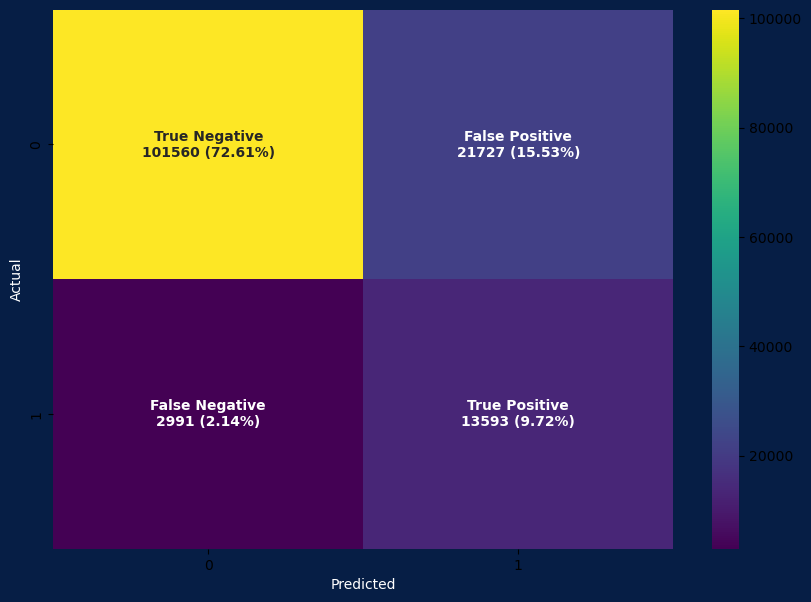

In [146]:
# Assuming X_test is your test dataset and model is your Gradient Boosting model
y_pred = logreg.predict(x_test_ss3)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('#061E45')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})  # Change heatmap color to 'viridis'
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')

plt.show()

<AxesSubplot:ylabel='Feature'>

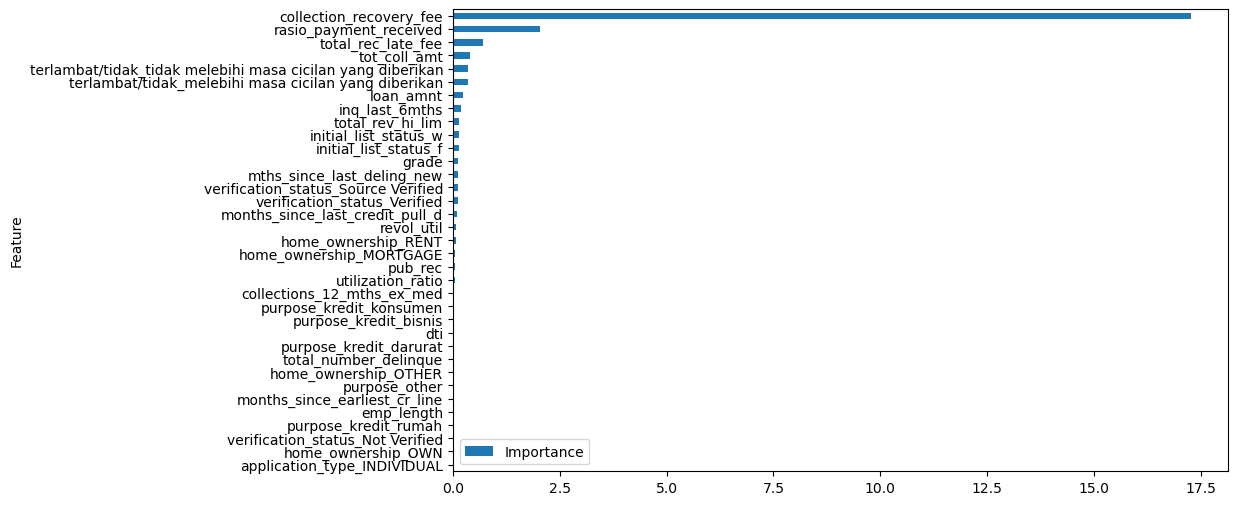

In [151]:
# Mengeluarkan feature importance
feature_importance = logreg.coef_[0]


feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(feature_importance)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

collection recovery fee, rasio payment received, total_rec_late_fee, jangka waktu pembayaran dan loan aount memilik peran penting dalam credit scoring